In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [5]:
import glob
import cv2

with tf.device('/device:GPU:0'):

  IMG_DIR='/content/drive/MyDrive/Kaggle Dataset/flowers/daisy'
  IMG_DIR1='/content/drive/MyDrive/Kaggle Dataset/flowers/dandelion'
  IMG_DIR2='/content/drive/MyDrive/Kaggle Dataset/flowers/rose'
  IMG_DIR3='/content/drive/MyDrive/Kaggle Dataset/flowers/sunflower'
  IMG_DIR4='/content/drive/MyDrive/Kaggle Dataset/flowers/tulip'

  def read_images(directory):
      for img in glob.glob(directory+"/*.jpg"):
          image = cv2.imread(img)
          resized_img = cv2.resize(image/255.0  , (150 , 150))

          yield resized_img

  resized_imgs0 =  np.array(list(read_images(IMG_DIR)))
  resized_imgs1 =  np.array(list(read_images(IMG_DIR1)))
  resized_imgs2 =  np.array(list(read_images(IMG_DIR2)))
  resized_imgs3 =  np.array(list(read_images(IMG_DIR3)))
  resized_imgs4 =  np.array(list(read_images(IMG_DIR4)))

In [6]:
label0 = np.zeros((resized_imgs0.shape[0],1))   #0
label1 = np.ones((resized_imgs1.shape[0],1))  #1
label2 = np.ones((resized_imgs2.shape[0],1))*2 #2
label3 = np.ones((resized_imgs3.shape[0],1))*3 #3
label4 = np.ones((resized_imgs4.shape[0],1))*4  #4

In [7]:
data = np.concatenate((resized_imgs0,resized_imgs1,resized_imgs2,resized_imgs3,resized_imgs4))

In [8]:
data= data.reshape(data.shape[0], data.shape[1]*data.shape[2]*data.shape[3])

In [9]:
labels = np.concatenate((label0,label1,label2,label3,label4))

In [10]:
del resized_imgs0
del resized_imgs1
del resized_imgs2
del resized_imgs3
del resized_imgs4
del label0
del label1
del label2
del label3
del label4

In [11]:
import pandas as pd
data = pd.DataFrame(data)
data['labels'] = labels.astype('float32')

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(data.iloc[0:,:-1], data['labels'], test_size=0.3, random_state=42, stratify = labels)

In [13]:
train_data = np.array(train_data).reshape(len(train_data),150,150,3)
# test_data.reshape(150,150,3)

In [14]:
test_data = np.array(test_data).reshape(len(test_data),150,150,3)

In [15]:
train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')

In [17]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # samplewise_center=True,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [18]:
data_gen.fit(train_data)

In [19]:
data_gen.fit(test_data)

In [20]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [21]:
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [22]:
%tensorflow_version 2.x
import tensorflow as tf

In [23]:
with tf.device('/device:GPU:0'):
  result = model.fit(
          x= train_data,
          y= train_labels,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=100,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)

Epoch 1/100
30/30 [==============================] - 33s 87ms/step - loss: 1.5994 - accuracy: 0.2138 - val_loss: 1.5677 - val_accuracy: 0.2100
Epoch 2/100
30/30 [==============================] - 2s 61ms/step - loss: 1.5612 - accuracy: 0.2886 - val_loss: 1.5121 - val_accuracy: 0.3200
Epoch 3/100
30/30 [==============================] - 2s 82ms/step - loss: 1.5021 - accuracy: 0.3734 - val_loss: 1.4012 - val_accuracy: 0.4300
Epoch 4/100
30/30 [==============================] - 2s 61ms/step - loss: 1.3812 - accuracy: 0.4349 - val_loss: 1.2996 - val_accuracy: 0.4700
Epoch 5/100
30/30 [==============================] - 2s 61ms/step - loss: 1.3579 - accuracy: 0.4029 - val_loss: 1.2300 - val_accuracy: 0.4200
Epoch 6/100
30/30 [==============================] - 2s 61ms/step - loss: 1.2930 - accuracy: 0.4566 - val_loss: 1.1790 - val_accuracy: 0.4700
Epoch 7/100
30/30 [==============================] - 2s 60ms/step - loss: 1.2393 - accuracy: 0.4607 - val_loss: 1.1403 - val_accuracy: 0.5300
Epoch

In [24]:
model.evaluate(test_data,test_labels)

38/38 [==============================] - 1s 20ms/step - loss: 0.8016 - accuracy: 0.7102


[0.8015604615211487, 0.7101569175720215]

In [25]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

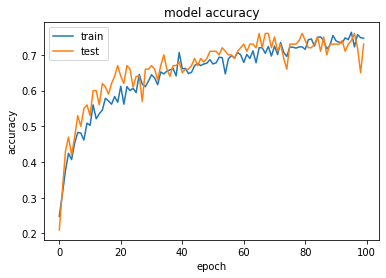

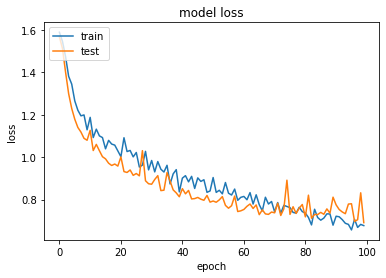

In [26]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred1 = model.predict(test_data)

In [ ]:
y_pred1.shape

In [ ]:
# list1 = []
# for i in range(0,len(validation_generator)):
#   for j in range(0,val_batch):
#     try:
#       list1.append(validation_generator[i][1][j].tolist())
#     except:
#       break

In [ ]:
np.argmax(y_pred1, axis=1)[0:30]

array([4, 0, 4, 4, 4, 3, 1, 3, 2, 2, 1, 3, 2, 2, 2, 4, 0, 2, 4, 1, 1, 0,
       4, 3, 1, 4, 3, 1, 4, 1])

In [ ]:
np.array(test_labels[0:30]).astype('int32')

array([4, 0, 2, 4, 4, 4, 1, 3, 4, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2, 1, 1, 0,
       4, 3, 1, 4, 3, 1, 4, 1], dtype=int32)

In [ ]:
plt.figure(figsize = (20,20))
for i in range(10):
    img = train_datagen[600*i][0]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(train_datagen[600*i][1])
plt.show()